# CSCI 3656 Group Project: Testing speed and accuracy of various astropy.modeling fits

### First we need to create synthetic data

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import ModelClass as mc
import StatsClass as sc
import DataClass as dc
from astropy import modeling
import time


# create instrument and star class for use in creating model spectra

class Instrument:
    def __init__(self, name = 'Unnamed', nlam = 100, lam_min = 100., lam_max = 1000., area = 1.):
        self.name = name
        self.nlam = nlam
        self.lam_min = lam_min
        self.lam_max = lam_max
        self.lam = np.linspace(lam_min, lam_max, nlam)
        self.lambin = (lam_max - lam_min) / float(nlam)
        self.area = self.lam * 0 + area
            
class Star():
    def __init__(self, name = '', m = 0, dist = 0, T = 0, radius = 0):
        self.name = name
        self.m = m
        self.dist = dist    # parsecs
        self.T = T          # F
        self.r = radius          # meters

### First, we create a model from known data

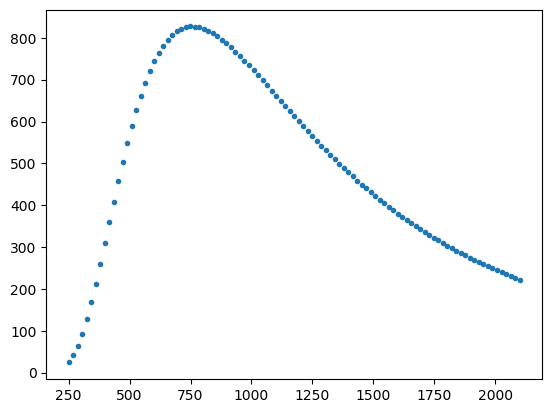

In [2]:
I = Instrument(nlam=101,lam_min=250,lam_max=2100,area=np.pi*1.2**2)
rand_star = Star(name = 'Randometra',dist = 250000, T = 4850, radius = 6.957e8)
M = mc.Model()
M.BlackbodyPhotons(rand_star, I, 10000)
plt.scatter(M.x,M.y, marker = '.', alpha = 1)
plt.show()

### Now we can add noise to this blackbody spectrum

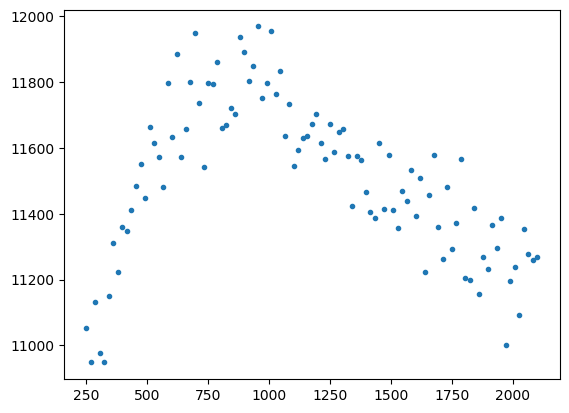

In [4]:
M.SimData(rand= "Poisson", xbar=0.,sigma=1., noise = 10000.)
plt.scatter(M.x,M.y, marker = '.')
plt.show()

### Now we do our fits